# DATA INFORMATION
   The data gives the information about a textile company regularly spent money on five advertising companies for their ads.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [2]:
dt=pd.read_csv("Add_sales_data_2018.csv")

In [3]:
dt.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
dt.shape

(205, 7)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
dt.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
# No null values present in the given data

In [8]:
dt["Profit(in Thousands)"].nunique()

205

In [9]:
dt.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


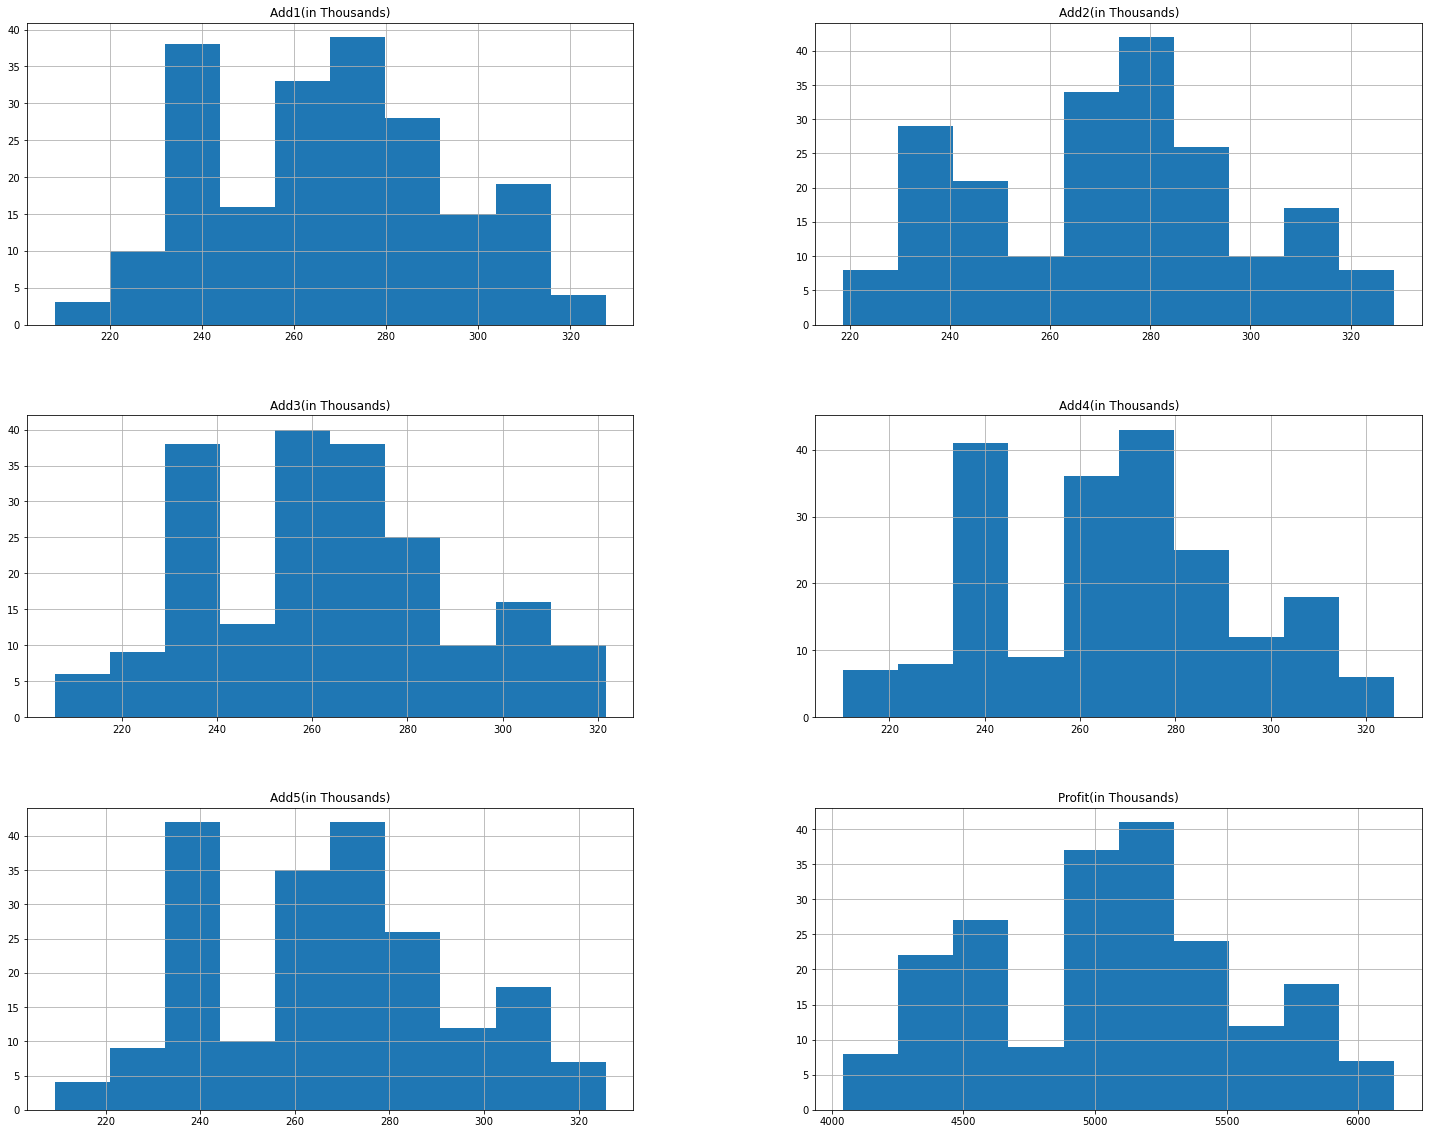

In [10]:
histogram=dt.select_dtypes(include=["float64", "object"])
histogram.hist(figsize=(25,20))
plt.show()

All the variables show almost a normal distribution in reference to the histogram.Add1, Add3,Add4 and Add5 have small shift towards right.

# 1.   Checking relation between amount for add by different companies and                       profit  for the textile company.

In [11]:
dtcorr=dt.corr()
dtcorr

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


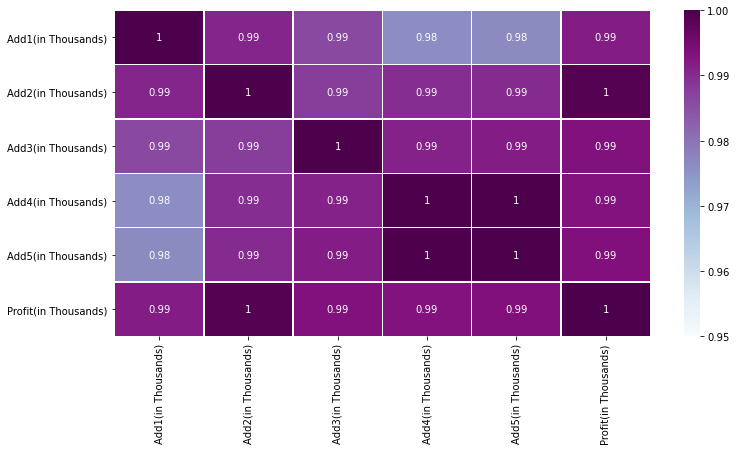

In [12]:
dtcorr=dt.corr()
plt.subplots(figsize=(12,6))
sns.heatmap(dtcorr,vmin=0.95,vmax=1,annot=True,linewidth=0.3,cmap="BuPu")
plt.show()

* From the given data every of the independent value have high positive correlation with others.
* This data reveals that there is an increase in the profit as the amount for the Add increases for the textile industry.
* For all the Add industry a similar relation exists with the textile industry. 


# 2. Build a regression model to predict the profit

In [13]:
dt.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [14]:
# Among them one of the highly correlated independent value is 'Add4(in Thousands)'.So we can drop it from the data to create a model.

In [15]:
#finding the independent and dependent features
# "y" corresponds to the dependent variable 
y=dt['Profit(in Thousands)'].values
# "X" corresponds to the independent variable to be dropped
X=dt.drop(['Date','Profit(in Thousands)','Add4(in Thousands)'],axis=1).values

In [16]:
X.shape

(205, 4)

In [17]:
# Splitting the data into test and train sets
# importing  train_test_split function from scikitlearn

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [19]:
# Building a model

In [20]:
from sklearn import linear_model

In [21]:
# training the model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)

In [22]:
# predicting the output profit of the data with X_test
prediction=model.predict(X_test)

In [23]:
# Output of the actual data
print(y_test)

[4494.144 5921.116 4404.686 4190.965 5880.541 5728.804 5225.14  5017.503
 5518.561 4513.6   4464.11  5140.372 4760.877 5038.222 4606.34  5730.999
 4922.845 4470.775 4480.363 5065.652 5043.705 5491.792 4968.03  5792.175
 6137.8   5247.011 5137.534 5373.275 5212.949 4898.776 5972.337 5745.806
 5153.977 5805.521 4763.69  4175.677 5938.474 4915.682 4523.704 5113.337
 4648.627 4350.683 4916.064 4934.682 5108.626 5167.878 4451.999 4980.446
 5177.61  5861.83  4425.005 4887.296 5267.657 5088.455 5163.693 5430.79
 5250.775 5435.316 5134.657 4435.174 4598.292 4979.399]


In [24]:
# Output of the prediction
print(prediction)

[4494.76219352 5921.32937484 4404.95873761 4190.73894654 5881.15491571
 5729.3199497  5225.04324807 5017.64805065 5518.86149135 4512.50353191
 4463.61415286 5140.05878968 4760.22089686 5038.41172238 4604.78499334
 5731.02584838 4922.37597296 4470.02793525 4480.33391222 5065.23243902
 5043.99681913 5491.86370856 4967.87423333 5791.0421254  6137.16987306
 5246.84255446 5136.67205083 5372.62513981 5212.58565963 4898.19668556
 5972.96408326 5746.39150059 5154.00086739 5805.179102   4763.32220569
 4175.19601641 5937.99887167 4914.57976359 4523.33235414 5113.40089988
 4648.4193896  4351.6346234  4916.2541734  4934.44506437 5108.68911655
 5167.94944462 4452.39580617 4980.73008769 5177.72219149 5861.98002211
 4424.85798654 4887.24481643 5268.16045171 5088.44755196 5164.23502257
 5430.79410705 5250.44154269 5434.84203352 5134.55550964 4433.91299622
 4597.93375501 4979.67757414]


In [25]:
from sklearn.metrics import r2_score
R_square=r2_score(y_test,prediction)
print("R-Squared value is",R_square)

R-Squared value is 0.9999988494007451


* R-square also helps in measuring the quality of a model by measuring the proportion of the variance for a dependent variable   that's explained by an independent variable or variables in a regression model.
* Here,R-square is 0.99, it means 99.9% of the variation in the output variable is explained by the input variables.
* This also tells the better fit of the model.

In [26]:
from sklearn.metrics import mean_squared_error
print ("MSE is",mean_squared_error(y_test,prediction))

MSE is 0.27419008763044717


* Mean squared error value obtained is 0.27 and closer to zero.This depicts that the actual value lies closer to the       regression line.
* Lower the MSE,closer the prediction to actual.This indicates a better fit in terms of model evaluation.


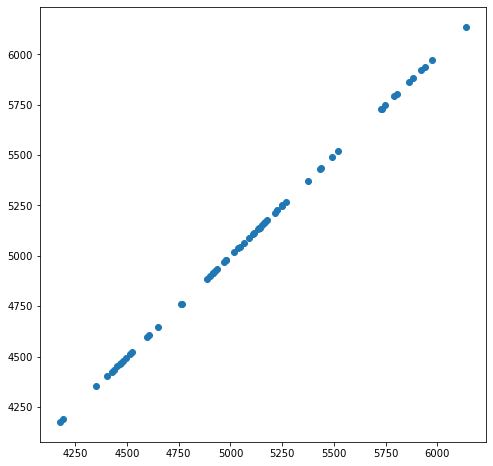

In [27]:
#plotting the scatter plot for the actual values with predicted values
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction)
plt.show()

# 3. Predict the profit with a new additional data

In [28]:
new_data={"Add1(in Thousands)":["290"],"Add2(in Thousands)":["312"],"Add3(in Thousands)":["309"],"Add4(in Thousands)":["298"],
"Add5(in Thousands)":["320"]}
df=pd.DataFrame(new_data)
df

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [29]:
# We have to drop "Add4(in Thousands)" since the value is droppped out due to high positive correlation to build the model  
df1=df.drop(["Add4(in Thousands)"],axis=1)
df1

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add5(in Thousands)
0,290,312,309,320


In [30]:
#Changing the dataframe into numpy array as to input values to the prediction model
new=df1.to_numpy()
new

array([['290', '312', '309', '320']], dtype=object)

In [31]:
#prediction of profit with the model
Profit=model.predict(new)
print("The predicted profit=",Profit)

The predicted profit= [5841.91948094]


In [32]:
# The predicted profit in accordance with the new data is 5841.919.